In [1]:
# Adaline Gradient Decent
import numpy as np

class AdalineGD:
  """ADAptive LInear NEuron classifier

  Parameters
  ------------
  eta: float
    Learning rate (between 0.0 and 1.0)
  n_iter: int
    Passes over the training dataset.
  random_state: int
    random number generator seed for random weight initialization.

    Attributes
    ------------
    w_: 1d-array
      Weights after fitting
    b_: Scalar
      Bias unit after fitting
    losses_: list
      Mean squared error loss function values in each epoch.

    """

  def __init__(self, eta, n_iter, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

  def fit(self, X, y):
        """Fit training data.

        Parameters
        -------------

        X: {array-like}, shape = {n_examples, n_features}
          Training vectors, where n_examples is the number of examples(rows) and n_features is the number of features(columns)
        y: {array-like}, shape = {n_example}
          Target values.

        Returns
        --------------
        self: object

        """

        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

  def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_) + self.b_

  def activation(self, X):
        """Compute linear activation"""
        return X

  def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

In [2]:
import os
import pandas as pd

s = 'https://archive.ics.uci.edu/ml/'\
      'machine-learning-databases/iris/iris.data'
print('From URL:', s)

From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [3]:
df = pd.read_csv(s, header=None, encoding='utf-8')
df.head(10)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
import matplotlib.pyplot as plt

#select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', 0, 1)

#extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

Text(0.5, 1.0, 'Adaline - Learning rate 0.0001')

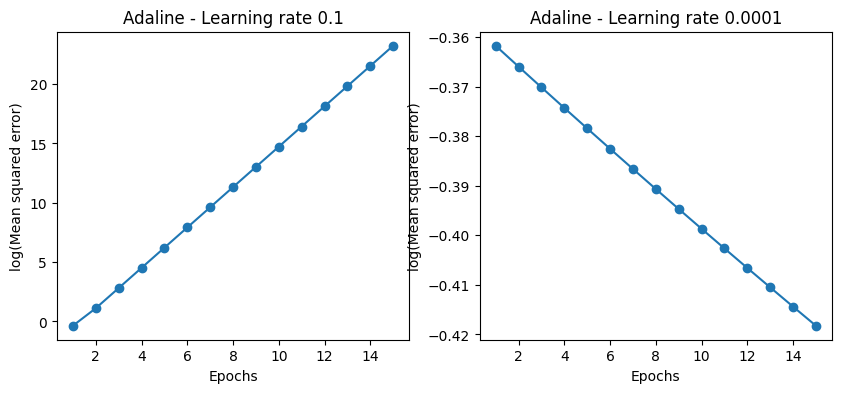

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,4))
ada1 = AdalineGD(n_iter=15, eta= 0.1).fit(X, y)
ax[0].plot(range(1, len(ada1.losses_)+1), np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')

ada2 = AdalineGD(n_iter= 15, eta= 0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.losses_)+1), np.log10(ada2.losses_), marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log(Mean squared error)')
ax[1].set_title('Adaline - Learning rate 0.0001')

Text(0.5, 1.0, 'Adaline - Learning rate 0.009')

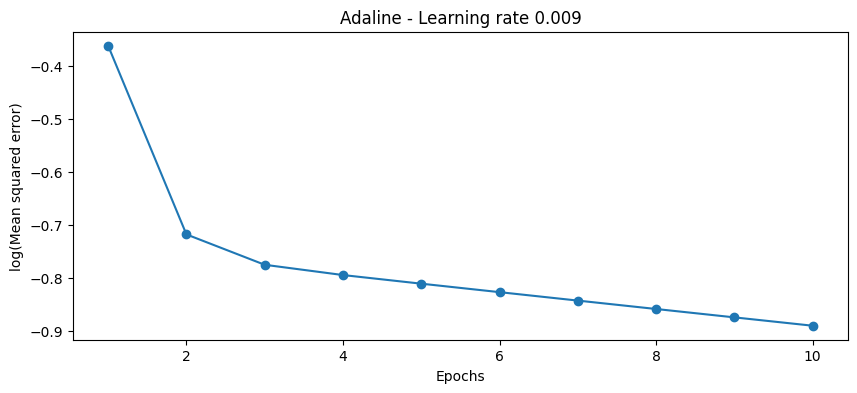

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ada3 = AdalineGD(n_iter=10, eta= 0.009).fit(X, y)
ax.plot(range(1, len(ada3.losses_)+1), np.log10(ada3.losses_), marker='o')
ax.set_xlabel('Epochs')
ax.set_ylabel('log(Mean squared error)')
ax.set_title('Adaline - Learning rate 0.009')

In [7]:
X_std = np.copy(X)

X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [8]:
ada_gd = AdalineGD(n_iter= 20, eta=0.5)
ada_gd.fit(X_std, y)

In [9]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
  #setup marker generator and color map
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreem', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])

  # plot the decision surface
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

  # plot class examples
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'class {cl}',
                edgecolor='black')

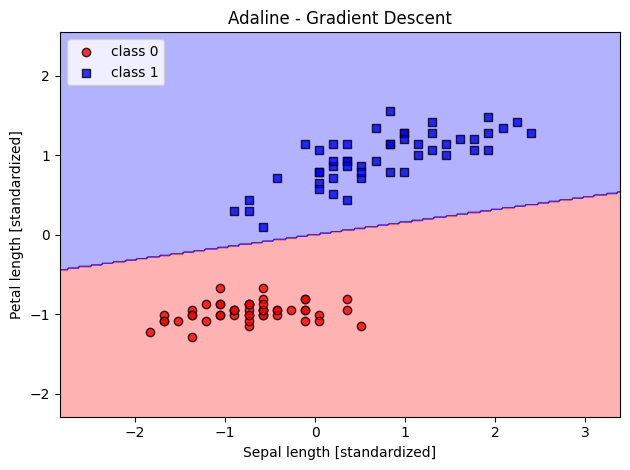

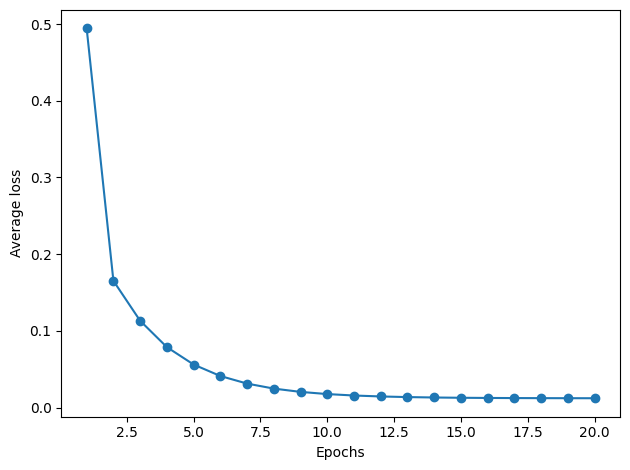

In [10]:
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1), ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()

**Stochastic Gradient Decent**


In [22]:
class AdalineSGD:
  """ADAptive LInear NEuron classifier

  Parameters
  ------------
  eta: float
    Learning rate (between 0.0 and 1.0)
  n_iter: int
    Passes over the training dataset.
  random_state: int
    random number generator seed for random weight initialization.

    Attributes
    ------------
    w_: 1d-array
      Weights after fitting
    b_: Scalar
      Bias unit after fitting
    losses_: list
      Mean squared error loss function values in each epoch.

    """
  def __init__(self, eta, n_iter, shuffle=True, random_state=None):
    self.eta = eta
    self.n_iter = n_iter
    self.w_initialized = False
    self.shuffle = shuffle
    self.random_state = random_state

  def fit(self, X, y):
    """Fit training data

    Parameters
    -------------

    X: {array-like}, shape = {n_examples, n_features}
      Training vectors, where n_examples is the number of examples(rows) and
      n_features is the number of features(columns)
    y: {array-like}, shape = {n_example}
      Target values.

    Returns
    --------------
    self: object

    """

    self._initialize_weights(X.shape[1])
    self.losses_ = []
    for i in range(self.n_iter):
      if self.shuffle:
        X, y = self._shuffle(X, y)
      losses = []
      for xi, target in zip(X, y):
        losses.append(self._update_weights(xi, target))
      avg_loss = np.mean(losses)
      self.losses_.append(avg_loss)
    return self

  def partial_fit(self, X, y):
      """Fit training data without reinitializing the weights"""
      if not self.w_initialized:
        self._initialize_weights(X.shape[1])
      if y.ravel().shape[0] > 1:
        for xi, target in zip(X, y):
          self._update_weights(xi, target)
      else:
        self._update_weights(X, y)
      return self

  def _shuffle(self, X, y):
      """Shuffle training data"""
      r = self.rgen.permutation(len(y))
      return X[r], y[r]

  def _initialize_weights(self, m):
      """Initialize weights to small random numbers"""
      self.rgen = np.random.RandomState(self.random_state)
      self.w_ = self.rgen.normal(loc=0.0, scale=0.01, size=m)
      self.b_ = np.float_(0.)
      self.w_initialized = True

  def _update_weights(self, xi, target):
      """Apply Adaline learning rule to update the weights"""
      output = self.activation(self.net_input(xi))
      error = (target - output)
      self.w_ += self.eta * 2.0 * xi * (error)
      self.b_ += self.eta * 2.0 * error
      loss = error**2
      return loss

  def net_input(self, X):
      """Calculate net input"""
      return np.dot(X, self.w_) + self.b_

  def activation(self, X):
      """ Compute linear activation"""
      return X

  def predict(self, X):
      """Return class label after unit step"""
      return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

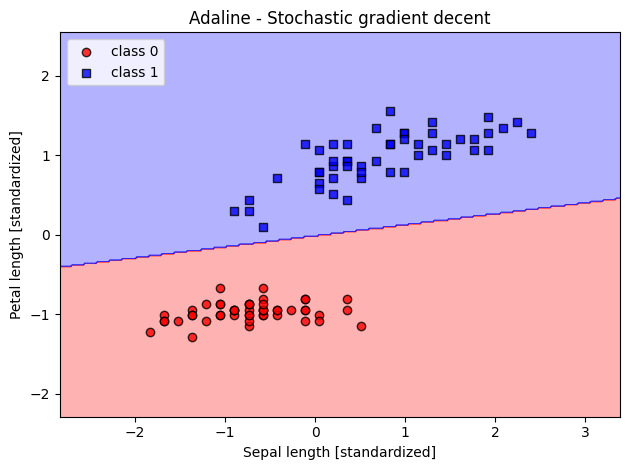

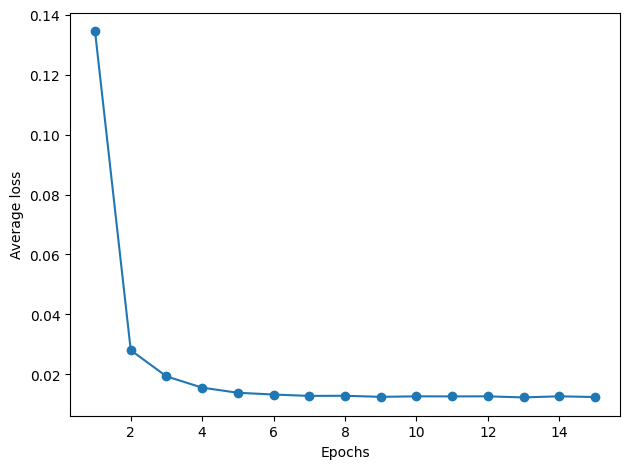

In [25]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient decent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()